# Wave Identification Example

Wave identification of Yang et al (2003) method using wave_identify module. 

In [ ]:
import sys
#specify src path for module
sys.path.append('../src/')
import wave_identify as W
import xarray as xr

# Load files
Should be an xarray file of zonal wind, meridional wind and geopotential height. Can be at one pressure level or multiple. If just one pressure level the data will need to be adjusted to have a pressure dimension of length 1 (e.g. using ```nc.expand_dims({'pressure':[850]})```)

In [ ]:
input_dir = '/path/to/era5/uvz850_6h/'
#Load file which contains u, v, z 
input_fname = f'{input_dir}era5_uvz850_6h_1x1_*.nc'
nc = xr.open_mfdataset(input_fname)

In [10]:
nc

<xarray.Dataset> Size: 746MB
Dimensions:         (valid_time: 2432, pressure_level: 1, latitude: 71,
                     longitude: 360)
Coordinates:
    number          int64 8B 0
  * valid_time      (valid_time) datetime64[ns] 19kB 2023-09-01 ... 2025-04-3...
  * pressure_level  (pressure_level) float64 8B 850.0
  * latitude        (latitude) float64 568B 35.0 34.0 33.0 ... -33.0 -34.0 -35.0
  * longitude       (longitude) float64 3kB 0.0 1.0 2.0 ... 357.0 358.0 359.0
    expver          (valid_time) <U4 39kB dask.array<chunksize=(120,), meta=np.ndarray>
Data variables:
    u               (valid_time, pressure_level, latitude, longitude) float32 249MB dask.array<chunksize=(120, 1, 71, 360), meta=np.ndarray>
    v               (valid_time, pressure_level, latitude, longitude) float32 249MB dask.array<chunksize=(120, 1, 71, 360), meta=np.ndarray>
    z               (valid_time, pressure_level, latitude, longitude) float32 249MB dask.array<chunksize=(120, 1, 71, 360), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-11T14:03 GRIB to CDM+CF via cfgrib-0.9.1...

# Make correct format

May need to adjust dims depending on input file to have dims time,pressure,latitude,longitude


In [11]:
nc = nc.rename({'valid_time':'time','pressure_level':'pressure'})

In [12]:
nc


<xarray.Dataset> Size: 746MB
Dimensions:    (time: 2432, pressure: 1, latitude: 71, longitude: 360)
Coordinates:
    number     int64 8B 0
  * time       (time) datetime64[ns] 19kB 2023-09-01 ... 2025-04-30T18:00:00
  * pressure   (pressure) float64 8B 850.0
  * latitude   (latitude) float64 568B 35.0 34.0 33.0 32.0 ... -33.0 -34.0 -35.0
  * longitude  (longitude) float64 3kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
    expver     (time) <U4 39kB dask.array<chunksize=(120,), meta=np.ndarray>
Data variables:
    u          (time, pressure, latitude, longitude) float32 249MB dask.array<chunksize=(120, 1, 71, 360), meta=np.ndarray>
    v          (time, pressure, latitude, longitude) float32 249MB dask.array<chunksize=(120, 1, 71, 360), meta=np.ndarray>
    z          (time, pressure, latitude, longitude) float32 249MB dask.array<chunksize=(120, 1, 71, 360), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-11T14:03 GRIB to CDM+CF via cfgrib-0.9.1...

# Run filtering function

In [17]:
#additional inputs can be included, but defaults are indicative of our usual settings
#freq = 0.25 - corresponds to 6-hourly data, can also indicate daily using freq=1
#taper_days = 45 - tapers 45 days on both ends (if taper_kind is kept as 'both') to reduce noise in filtering

wave_ncs = W.filt_project_func(u=nc.u,gh=nc.z,v=nc.v,freq=.25,taper_days=45)

mode in output corresponds to wave type

0 - Kelvin (v will be NaN)\
1 - WMRG\
2 - R1\
3 - R2

In [15]:

wave_ncs


<xarray.Dataset> Size: 5GB
Dimensions:    (time: 2072, pressure: 1, longitude: 360, mode: 4, latitude: 71)
Coordinates:
  * time       (time) datetime64[ns] 17kB 2023-10-16 ... 2025-03-16T18:00:00
  * pressure   (pressure) float64 8B 850.0
  * longitude  (longitude) float64 3kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * mode       (mode) int64 32B 0 1 2 3
  * latitude   (latitude) float64 568B 35.0 34.0 33.0 32.0 ... -33.0 -34.0 -35.0
Data variables:
    u          (time, pressure, longitude, mode, latitude) float64 2GB 0.0002...
    v          (mode, time, pressure, longitude, latitude) float64 2GB nan .....
    z          (time, pressure, longitude, mode, latitude) float64 2GB 0.0005...

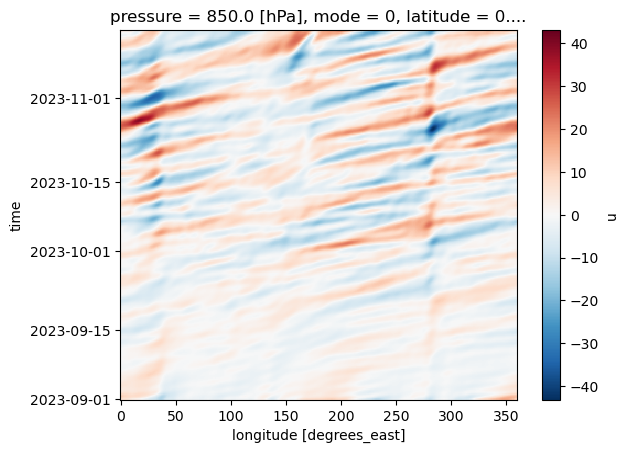

In [18]:
#plotting Kelvin wave equatorial zonal wind
wave_ncs.isel(time=slice(0,300)).sel(latitude=0,mode=0).squeeze().u.plot()

In [19]:
#optional but recommended: remove tapered data
wave_ncs = wave_ncs.isel(time=slice(4*45,-4*45))

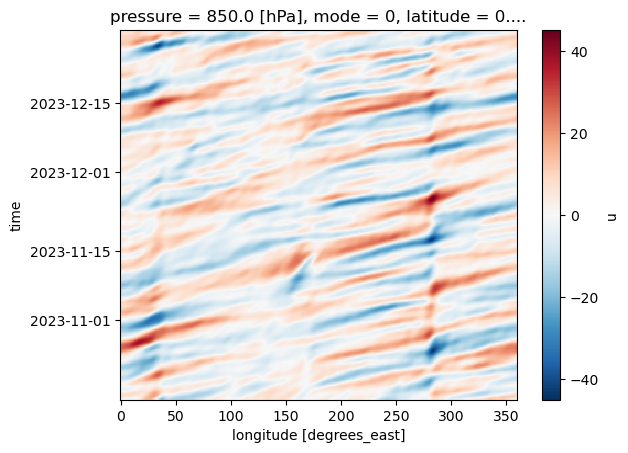

In [ ]:
wave_ncs.isel(time=slice(0,300)).sel(latitude=0,mode=0).squeeze().u.plot()